In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_matches=pd.read_csv("england-premier-league-matches-2017-to-2022-stats.csv")

In [3]:
matches2017=raw_matches.iloc[0:380,:-26].drop(['away_ppg','home_ppg'],axis=1)

In [4]:
def calculate_home_points(row):
    if row["home_team_goal_count"] > row["away_team_goal_count"]:
        return 3
    elif row["home_team_goal_count"] == row["away_team_goal_count"]:
        return 1
    else:
        return 0
    
def calculate_away_points(row):
    if row["home_team_goal_count"] < row["away_team_goal_count"]:
        return 3
    elif row["home_team_goal_count"] == row["away_team_goal_count"]:
        return 1
    else:
        return 0

In [5]:
matches2017

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_shots_off_target,away_team_shots_off_target,home_team_fouls,away_team_fouls,home_team_possession,away_team_possession
0,1502477100,Aug 11 2017 - 6:45pm,complete,59387.0,Arsenal,Leicester City,Mike Dean,1,0.00,0.00,...,20,7,11,4,9,3,9,12,70,30
1,1502537400,Aug 12 2017 - 11:30am,complete,20407.0,Watford,Liverpool,Anthony Taylor,1,0.00,0.00,...,9,14,5,6,4,8,14,8,45,55
2,1502546400,Aug 12 2017 - 2:00pm,complete,41616.0,Chelsea,Burnley,Craig Pawson,1,0.00,0.00,...,13,10,7,6,6,4,16,11,61,39
3,1502546400,Aug 12 2017 - 2:00pm,complete,25448.0,Crystal Palace,Huddersfield Town,Jonathan Moss,1,0.00,0.00,...,12,10,5,7,7,3,7,19,56,44
4,1502546400,Aug 12 2017 - 2:00pm,complete,39045.0,Everton,Stoke City,Neil Swarbrick,1,0.00,0.00,...,8,8,5,2,3,6,13,10,61,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,1526220000,May 13 2018 - 2:00pm,complete,52294.0,Newcastle United,Chelsea,Martin Atkinson,38,1.39,1.83,...,13,8,7,3,6,5,11,9,45,55
376,1526220000,May 13 2018 - 2:00pm,complete,31882.0,Southampton,Manchester City,Andre Marriner,38,1.06,2.61,...,8,14,3,3,5,11,9,7,37,63
377,1526220000,May 13 2018 - 2:00pm,complete,20673.0,Swansea City,Stoke City,Anthony Taylor,38,1.17,0.56,...,20,6,10,5,10,1,10,11,61,39
378,1526220000,May 13 2018 - 2:00pm,complete,77841.0,Tottenham Hotspur,Leicester City,Craig Pawson,38,2.22,1.11,...,12,17,7,10,5,7,9,13,62,38


In [6]:
matches2017["home_points_gained"] = matches2017.apply(calculate_home_points, axis=1)
matches2017["away_points_gained"] = matches2017.apply(calculate_away_points, axis=1)

In [9]:
home_games = matches2017.groupby("home_team_name").sum(numeric_only=True)
away_games = matches2017.groupby("away_team_name").sum(numeric_only=True)

away_games_clean = away_games.filter(like='away')
away = away_games_clean.rename(columns=lambda x: x.replace('away_', ''))

home_games_clean = home_games.filter(like='home')
home = home_games_clean.rename(columns=lambda x: x.replace('home_', ''))

In [10]:
home

,team_goal_count,team_goal_count_half_time,team_corner_count,team_yellow_cards,team_red_cards,team_first_half_cards,team_second_half_cards,team_shots,team_shots_on_target,team_shots_off_target,team_fouls,team_possession,points_gained
home_team_name,,,,,,,,,,,,,
AFC Bournemouth,26,8,115,32,1,13,20,209,101,108,165,931,26
Arsenal,54,23,132,25,1,8,18,271,166,105,186,1187,47
Brighton & Hove Albion,24,8,90,37,1,4,34,186,90,96,198,845,29
Burnley,16,7,94,27,0,13,14,166,84,82,167,878,26
Chelsea,30,15,148,21,3,5,19,279,147,132,183,1065,37
Crystal Palace,29,14,105,39,0,10,29,226,112,114,214,869,26
Everton,28,7,81,29,1,12,18,158,76,82,235,882,34
Huddersfield Town,16,10,102,27,2,7,22,165,73,92,179,923,23
Leicester City,25,11,112,24,2,6,20,182,93,89,179,954,27


In [17]:
total_data=home.add(away)
total_data["pred_top4"]=[1 if i>=67 else 0 for i in total_data['points_gained']]

<AxesSubplot:>

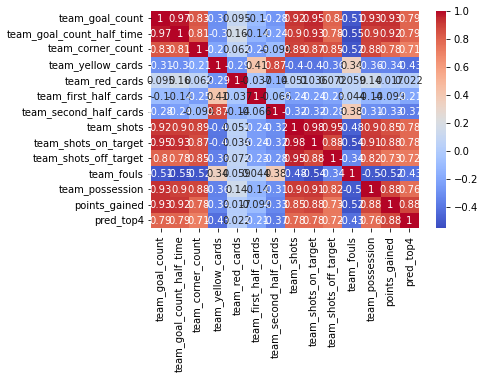

In [18]:
# Create a correlation matrix
corr_matrix = total_data.corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [20]:
corr_points = corr_matrix.loc["points_gained"]
corr_top4 = corr_matrix.loc["points_gained"]
print(corr_points,corr_top4)

team_goal_count              0.931840
team_goal_count_half_time    0.916132
team_corner_count            0.784986
team_yellow_cards           -0.341744
team_red_cards               0.016782
team_first_half_cards       -0.099482
team_second_half_cards      -0.333615
team_shots                   0.848599
team_shots_on_target         0.884156
team_shots_off_target        0.727571
team_fouls                  -0.518825
team_possession              0.880879
points_gained                1.000000
pred_top4                    0.882147
Name: points_gained, dtype: float64 team_goal_count              0.931840
team_goal_count_half_time    0.916132
team_corner_count            0.784986
team_yellow_cards           -0.341744
team_red_cards               0.016782
team_first_half_cards       -0.099482
team_second_half_cards      -0.333615
team_shots                   0.848599
team_shots_on_target         0.884156
team_shots_off_target        0.727571
team_fouls                  -0.518825
team_possessio